In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [3]:
rollno = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
name = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", np.nan, np.nan, "k", "l", "m"]
marks = [40, 23, 50, 78, 48, 89, 90, 67, 84, 96, 76, np.nan, 97, np.nan, 65]
grade = ["F", "F", "P", "P", "P", "P", "P", "P", "P", "P", "F", "F", "P", np.nan, np.nan]


In [4]:
df = pd.DataFrame({"rollno" : rollno, "name" : name, "marks" : marks, "grade" : grade})

In [5]:
df


,rollno,name,marks,grade
0,1,a,40.0,F
1,2,b,23.0,F
2,3,c,50.0,P
3,4,d,78.0,P
4,5,e,48.0,P
5,6,f,89.0,P
6,7,g,90.0,P
7,8,h,67.0,P
8,9,i,84.0,P
9,10,j,96.0,P


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rollno  15 non-null     int64  
 1   name    13 non-null     object 
 2   marks   13 non-null     float64
 3   grade   13 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 608.0+ bytes


In [7]:
df.isnull().sum()

rollno    0
name      2
marks     2
grade     2
dtype: int64

In [8]:
df.columns

Index(['rollno', 'name', 'marks', 'grade'], dtype='object')

In [9]:
df.dtypes

rollno      int64
name       object
marks     float64
grade      object
dtype: object

In [10]:
df.describe()

,rollno,marks
count,15.000000,13.000000
mean,8.000000,69.461538
std,4.472136,23.247277
min,1.000000,23.000000
25%,4.500000,50.000000
50%,8.000000,76.000000
75%,11.500000,89.000000
max,15.000000,97.000000


In [11]:
df.to_csv("student_performance.csv")

###  Null Values Handling

In [12]:
df.isnull().sum()

rollno    0
name      2
marks     2
grade     2
dtype: int64

In [13]:
df["marks"].mean()

69.46153846153847

In [14]:
df["marks"] = df["marks"].fillna(df["marks"].mean())

In [15]:
df


,rollno,name,marks,grade
0,1,a,40.000000,F
1,2,b,23.000000,F
2,3,c,50.000000,P
3,4,d,78.000000,P
4,5,e,48.000000,P
5,6,f,89.000000,P
6,7,g,90.000000,P
7,8,h,67.000000,P
8,9,i,84.000000,P
9,10,j,96.000000,P


In [16]:
def floorValue(value):
    return int(math.floor(value))

df["marks"] = df["marks"].apply(floorValue)

In [17]:
df

,rollno,name,marks,grade
0,1,a,40,F
1,2,b,23,F
2,3,c,50,P
3,4,d,78,P
4,5,e,48,P
5,6,f,89,P
6,7,g,90,P
7,8,h,67,P
8,9,i,84,P
9,10,j,96,P


In [18]:
df['name'].notna()

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10    False
11    False
12     True
13     True
14     True
Name: name, dtype: bool

In [19]:
df = df[df['name'].notna()]

In [20]:
df

,rollno,name,marks,grade
0,1,a,40,F
1,2,b,23,F
2,3,c,50,P
3,4,d,78,P
4,5,e,48,P
5,6,f,89,P
6,7,g,90,P
7,8,h,67,P
8,9,i,84,P
9,10,j,96,P


In [21]:
for index, row in df.iterrows():
    if(row["marks"]>=40):  
        df.loc[index, "grade"] = 'P'
    else:
        df.loc[index, "grade"] = 'F'

In [22]:
df

,rollno,name,marks,grade
0,1,a,40,P
1,2,b,23,F
2,3,c,50,P
3,4,d,78,P
4,5,e,48,P
5,6,f,89,P
6,7,g,90,P
7,8,h,67,P
8,9,i,84,P
9,10,j,96,P


In [23]:
firstOutlier = [16,'n',-100,'F']
secondOutlier = [17,'o',200,'P']

In [24]:
df.loc[15] = firstOutlier
df.loc[16] = secondOutlier

C:\Users\prath\AppData\Local\Temp\ipykernel_22520\2050118484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[15] = firstOutlier


In [25]:
df

,rollno,name,marks,grade
0,1,a,40,P
1,2,b,23,F
2,3,c,50,P
3,4,d,78,P
4,5,e,48,P
5,6,f,89,P
6,7,g,90,P
7,8,h,67,P
8,9,i,84,P
9,10,j,96,P


<Axes: xlabel='marks', ylabel='count'>

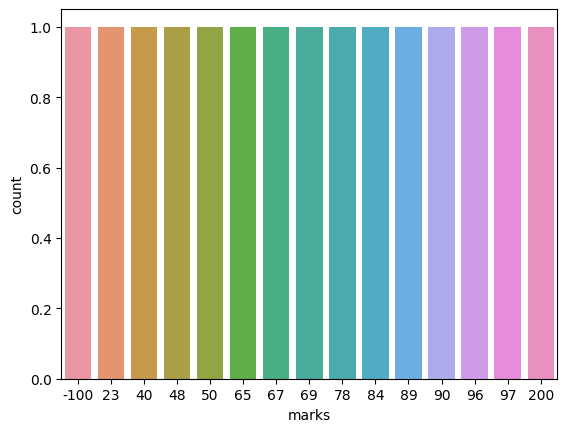

In [26]:
sns.countplot(data = df, x=df['marks'])

<Axes: xlabel='marks'>

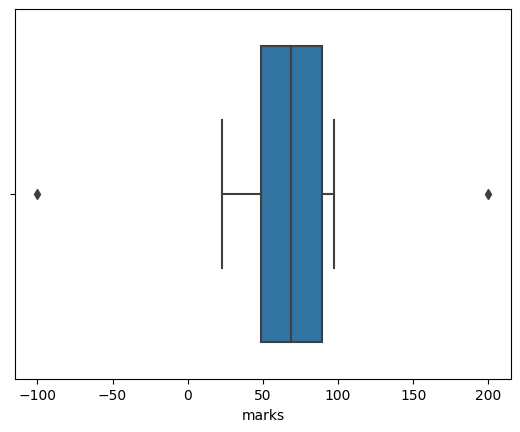

In [27]:
sns.boxplot(data = df, x = df['marks'])

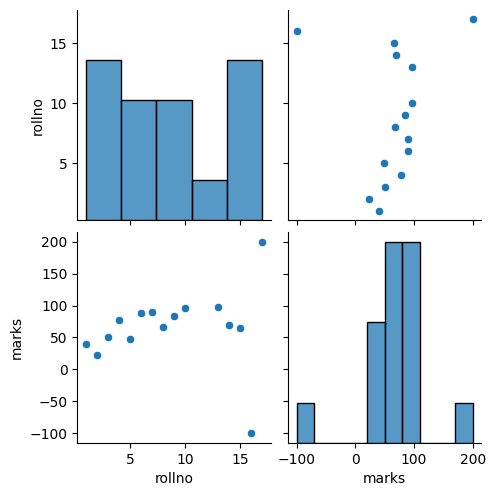

In [28]:
sns.pairplot(df,)

In [37]:
from matplotlib.cbook import boxplot_stats
outliers = boxplot_stats(df['marks']).pop(0)['fliers']
outliers


array([], dtype=float64)

AttributeError: 'dict' object has no attribute 'fliers'

In [38]:
df


,rollno,name,marks,grade
0,1,a,0.229730,P
1,2,b,0.000000,F
2,3,c,0.364865,P
3,4,d,0.743243,P
4,5,e,0.337838,P
5,6,f,0.891892,P
6,7,g,0.905405,P
7,8,h,0.594595,P
8,9,i,0.824324,P
9,10,j,0.986486,P


In [44]:
df = df.drop([15,16])

KeyError: '[15, 16] not found in axis'

In [ ]:
df

,rollno,name,marks,grade
0,1,a,40,P
1,2,b,23,F
2,3,c,50,P
3,4,d,78,P
4,5,e,48,P
5,6,f,89,P
6,7,g,90,P
7,8,h,67,P
8,9,i,84,P
9,10,j,96,P


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df['marks'] = scaler.fit_transform(df[['marks']])

In [ ]:
df

,rollno,name,marks,grade
0,1,a,0.229730,P
1,2,b,0.000000,F
2,3,c,0.364865,P
3,4,d,0.743243,P
4,5,e,0.337838,P
5,6,f,0.891892,P
6,7,g,0.905405,P
7,8,h,0.594595,P
8,9,i,0.824324,P
9,10,j,0.986486,P
